
# First Steps with a Multi-layer Perceptron (MLP) in Scikit-Learn



## 1. A simple classification problem

The Scikit-learn class for MLP is **MLPClassifier**.
Please read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier).

**Question #1: Describe briefly the role of each import.**

In [4]:
#  allows to draw static images in the notebook
%matplotlib inline   

import numpy as np #importing numpy library which contains a large collection of high-level mathematical functions

from matplotlib import pyplot as plt  # plotting library
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split  # enables to split the data into training and test sets
from sklearn import preprocessing 

from sklearn.preprocessing import StandardScaler  # helps to standardize features 
from sklearn.datasets import make_moons   # our dataset

from sklearn.neural_network import MLPClassifier   # multilayer perceptron classifier library

In C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

**Question #2: what is the output of "make_moons"?**

In [9]:
# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
print("X: ")
print(X[:10])
print("y: ")
print(y[:10])

X: 
[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]]
y: 
[0 1 0 1 1 1 0 1 1 1]


**Question #3: what is the interest of "StandardScaler()"?**

In [11]:
# Preprocess dataset, and split into training and test part
X = StandardScaler(with_mean=True, with_std=True).fit_transform(X)

**A: Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.**


**Question #4: what is the proportion of training samples?**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

**A: 70% of the data is for the training and 30% is for the test.**

**Question #5: what is the one-hot encoding?**

In [13]:
# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

**A: One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

In [14]:
# Print beginning of training dataset (for verification)
print("Number of training samples = ", y_train.size)
print()
print("First ", round(y_train.size), "training samples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_train.size) )):
    print( X_train[i], Y_train_OneHot[i])

Number of training samples =  30

First  30 training samples
[  Input_features  ]     [Target_output]
[ 0.62682189 -2.14337167] [0. 1.]
[0.4860189  1.96041925] [1. 0.]
[ 1.15004209 -0.46423271] [1. 0.]
[-0.1636123  -1.53782127] [0. 1.]
[-0.33075371 -0.55325533] [0. 1.]
[ 1.53916295 -0.40646646] [0. 1.]
[0.27524467 0.58976897] [1. 0.]
[ 0.23092986 -1.16563865] [0. 1.]
[-0.71978547  1.72334673] [1. 0.]
[1.39730283 0.39040035] [0. 1.]
[ 0.59260113 -1.44842808] [0. 1.]
[0.03138162 1.27867747] [1. 0.]
[-0.09130345 -0.93824346] [0. 1.]
[-0.28724359  1.0525906 ] [1. 0.]
[-0.99471418 -0.7858591 ] [0. 1.]
[-1.63601617  1.14409337] [1. 0.]
[-0.17344159  1.50362044] [1. 0.]
[-0.31784745 -1.493817  ] [0. 1.]
[-0.34408365 -0.11501714] [0. 1.]
[0.24942261 0.37041953] [1. 0.]
[0.20764271 0.88856402] [1. 0.]
[1.85584796 0.39711336] [0. 1.]
[1.37086214 0.22375044] [0. 1.]
[-0.73153577  1.24236135] [1. 0.]
[-2.05161935  0.3295589 ] [1. 0.]
[ 1.7173351  -0.17875463] [0. 1.]
[ 1.12756772 -1.65289561] [0. 

**Question #6: what is the role of the "alpha" parameter?**

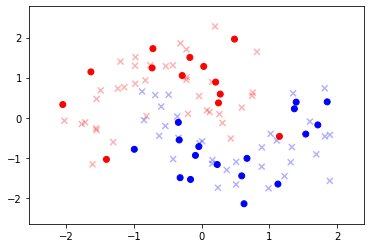


Plot of training samples and testing samples
Datasets: circles=training, light-crosses=test, red=class 1, blue=class 2


In [15]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Actually render the plot
print()
print("Plot of training samples and testing samples")
print("Datasets: circles=training, light-crosses=test, red=class 1, blue=class 2")


**A: Alpha controls the transperency of the points.**

**Question #7: Describe the role of each argument of "MLPClassifier"?**

**Question #8: Describe the neural network architecture (how many layers, how many neurons, etc)?**

In [16]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################
mlp = MLPClassifier(hidden_layer_sizes=(10, ),  #10 nodes, 2 layers
                    activation='relu',  #max(0,x) activation function
                    solver='sgd',  # stochastic gradient descent
                    alpha=0.0001, # L2 penalty (sum of the alpha*square of parameters) which controls the size or height of the parameters(theta)
                    batch_size=20, # size of minibatches
                    learning_rate='constant', 
                    learning_rate_init=0.05, 
                    max_iter=500, 
                    shuffle=True, # matter of ordering the data
                    tol=0.00001,  #tolerance (epsilon in lecture 41)
                    verbose=True) # having messages

print(mlp)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.05, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)


**Question #9: Comment the convergence of the learning step.**

**A: Iteration stopped because the loss is smaller than the given tolerance value.**

In [17]:
# Train the MLP classifier on training dataset
mlp.fit(X_train, Y_train_OneHot)  #Loss = R(theta)+alpha*sum(theta)**2

Iteration 1, loss = 1.23161837
Iteration 2, loss = 1.12509838
Iteration 3, loss = 0.99175117
Iteration 4, loss = 0.85232544
Iteration 5, loss = 0.73535611
Iteration 6, loss = 0.66154051
Iteration 7, loss = 0.59314353
Iteration 8, loss = 0.54616036
Iteration 9, loss = 0.51581160
Iteration 10, loss = 0.50182670
Iteration 11, loss = 0.48658136
Iteration 12, loss = 0.47960341
Iteration 13, loss = 0.47603152
Iteration 14, loss = 0.48776853
Iteration 15, loss = 0.48136048
Iteration 16, loss = 0.48393302
Iteration 17, loss = 0.47928889
Iteration 18, loss = 0.47899200
Iteration 19, loss = 0.48652961
Iteration 20, loss = 0.47750549
Iteration 21, loss = 0.47512060
Iteration 22, loss = 0.47038314
Iteration 23, loss = 0.46647183
Iteration 24, loss = 0.46668323
Iteration 25, loss = 0.46439356
Iteration 26, loss = 0.46204329
Iteration 27, loss = 0.46137220
Iteration 28, loss = 0.45767201
Iteration 29, loss = 0.45908191
Iteration 30, loss = 0.45925153
Iteration 31, loss = 0.45659732
Iteration 32, los

Iteration 275, loss = 0.19523949
Iteration 276, loss = 0.19739666
Iteration 277, loss = 0.18816130
Iteration 278, loss = 0.18618693
Iteration 279, loss = 0.18929794
Iteration 280, loss = 0.18291859
Iteration 281, loss = 0.18243975
Iteration 282, loss = 0.18789194
Iteration 283, loss = 0.19322265
Iteration 284, loss = 0.18380599
Iteration 285, loss = 0.17398252
Iteration 286, loss = 0.17819983
Iteration 287, loss = 0.19035073
Iteration 288, loss = 0.18857191
Iteration 289, loss = 0.18630029
Iteration 290, loss = 0.19177061
Iteration 291, loss = 0.17974947
Iteration 292, loss = 0.17323142
Iteration 293, loss = 0.17522270
Iteration 294, loss = 0.16932292
Iteration 295, loss = 0.17718563
Iteration 296, loss = 0.17141780
Iteration 297, loss = 0.16656026
Iteration 298, loss = 0.16144004
Iteration 299, loss = 0.16421984
Iteration 300, loss = 0.16687182
Iteration 301, loss = 0.17093597
Iteration 302, loss = 0.16094993
Iteration 303, loss = 0.15680311
Iteration 304, loss = 0.15572263
Iteration 

C:\Users\begum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.05, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)

**Question #10: compare the accuracy on the training samples to the accuracy on the testing samples. Is a gap expected or not? How a big gap should be interpreted?**

In [18]:
# Evaluate acuracy on training data
trainingScore = mlp.score(X_train,Y_train_OneHot)
print("Accuracy (on training set) = ", round(trainingScore,4))

# Evaluate acuracy on test data
testingScore = mlp.score(X_test,Y_test_OneHot)
print("Accuracy (on test set) = ", round(testingScore,4))



Accuracy (on training set) =  1.0
Accuracy (on test set) =  0.7429


**A: When we have more samples nn learns better. The gap between accuracy of training set and the set test will be smaller.**

**Question #11: What is the role of the "meshgrid"?**

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


**A: The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.**

**Question #12: What is the role of the "predict_proba"?**

In [20]:
# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
print(Z)

[[3.46984537e-04 4.10841303e-04 4.86444133e-04 ... 4.08323407e-01
  3.67633786e-01 3.28746020e-01]
 [3.43955059e-04 4.07254527e-04 4.82197638e-04 ... 3.83126800e-01
  3.43490389e-01 3.05920994e-01]
 [3.40952022e-04 4.03699052e-04 4.77988196e-04 ... 3.58542826e-01
  3.20129873e-01 2.84010206e-01]
 ...
 [4.84502853e-30 7.13035608e-30 1.04936385e-29 ... 9.99999978e-01
  9.99999984e-01 9.99999988e-01]
 [3.85842716e-30 5.67838960e-30 8.35680112e-30 ... 9.99999976e-01
  9.99999982e-01 9.99999987e-01]
 [3.07272911e-30 4.52208951e-30 6.65509156e-30 ... 9.99999974e-01
  9.99999981e-01 9.99999986e-01]]


**A: The function predict_proba gives the probability value of y being 0 or 1.**

**Question #13: How works "contourf"? What does it plot?**

**A: It draws filled contours.**

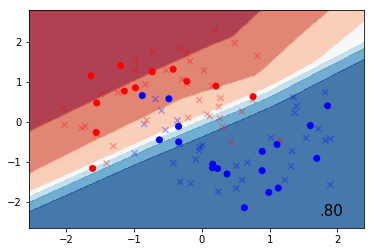

In [13]:
# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, 
         ('%.2f' % testingScore).lstrip('0'),
         size=15, horizontalalignment='right')

# Actually plot
plt.show()

## 2. Classification of Handwritten Digits

**Please read the [*Digits Dataset description*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

There are 10 classes, with a total of 1797 examples (each one being a vector of size 64 corresponding to an 8x8 image). 

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Number of samples =  1797

 Plot of the first sample


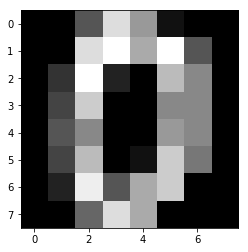

In [15]:
# load the data
digits = load_digits()
n_samples = len(digits.images)
print("Number of samples = ", n_samples)

print("\n Plot of the first sample")
plt.imshow(digits.images[0], cmap='gray')
plt.show()

**Question #14: what is the role of "reshape"?**

In [30]:
# Flatten the images, to turn data in a (samples, feature) matrix
data = digits.images.reshape((n_samples, -1))
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

**A: Gives a new shape to an array without changing its data.**

**Question #15: Propose a change of the learning hyper-parameters in order to obtain a satisfying MLP digits classifier.**

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(10, ), 
                    activation='tanh', 
                    solver='sgd', 
                    alpha=0.00001, 
                    batch_size=4, 
                    learning_rate='constant', 
                    learning_rate_init=0.1, 
                    max_iter=200, 
                    shuffle=True, 
                    tol=0.00001, 
                    verbose=True)
print(mlp)



MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)


In [36]:
# Train the MLP classifier on training dataset
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.69030073
Iteration 2, loss = 2.72243914
Iteration 3, loss = 2.71767290
Iteration 4, loss = 2.70367081
Iteration 5, loss = 2.71543116
Iteration 6, loss = 2.71110656
Iteration 7, loss = 2.71464387
Iteration 8, loss = 2.81183092
Iteration 9, loss = 2.71836181
Iteration 10, loss = 2.73897858
Iteration 11, loss = 2.76040953
Iteration 12, loss = 2.74625991
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [37]:
# Evaluate acuracy on training data
trainingScore = mlp.score(X_train,y_train)
print("Accuracy (on training set) = ", round(trainingScore,4))
# Evaluate acuracy on test data
testingScore = mlp.score(X_test,y_test)
print("Accuracy (on test set) = ", round(testingScore,4))

Accuracy (on training set) =  0.1036
Accuracy (on test set) =  0.0979


**Question #26: What is the meaning of the information printed by the cell below?**

In [38]:
y_true, y_pred = y_test, mlp.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        87
           4       0.10      1.00      0.18        88
           5       0.00      0.00      0.00        89
           6       0.00      0.00      0.00        98
           7       0.00      0.00      0.00        85
           8       0.00      0.00      0.00        85
           9       0.00      0.00      0.00        92

   micro avg       0.10      0.10      0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**A: The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.**